<a href="https://colab.research.google.com/github/mamonalsalihy/Emotion_Detection/blob/main/Spacy_word_similarity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Pipeline


In [ ]:
from tqdm.auto import tqdm
import os
import pandas as pd
import csv
import pickle as pkl

In [ ]:
#Downloads word vectors
!python -m spacy download en_core_web_lg

In [ ]:
!wget https://dl.fbaipublicfiles.com/parlai/empatheticdialogues/empatheticdialogues.tar.gz
!tar xvf empatheticdialogues.tar.gz

In [ ]:
!cat empatheticdialogues/train.csv

In [ ]:
def prepare_dataset(target_file):
  dataset_dir = os.path.join(os.getcwd(),'empatheticdialogues')

  examples = {}
  
  for file in tqdm(os.listdir(dataset_dir)):
    if file == target_file + '.csv':
      file_path = os.path.join(dataset_dir,file)
      return pd.read_csv(file_path,error_bad_lines=False)
    

In [ ]:
df = prepare_dataset('train')

In [ ]:
negative_emotions = ['afraid','angry','annoyed','anxious','apprehensive','ashamed','devastated','disappointed','disgusted','embarrassed','furious','guilty','jealous','lonely','sad','terrified']
neutral_emotions = ['anticipating','faithful','hopeful','nostalgic','prepared','trusting']
positive_emotions = ['caring','confident','content','excited','grateful','impressed','joyful','proud','sentimental','surprised']

In [ ]:
def convert_labels_to_strings(labels):
  return ' '.join(labels)

In [ ]:
labels = convert_labels_to_strings(positive_emotions + negative_emotions + neutral_emotions)

In [ ]:
import en_core_web_lg

nlp = en_core_web_lg.load()
tokens = nlp(labels)

similar_groups = {}
for token1 in tokens:
    for token2 in tokens:
      if token1.similarity(token2) > 0.5 and token1.text != token2.text:
        similar_groups[(token1.text,token2.text)] = token1.similarity(token2)
len(similar_groups),similar_groups

(284,
 {('afraid', 'angry'): 0.6656315,
  ('afraid', 'annoyed'): 0.6348786,
  ('afraid', 'anxious'): 0.68030304,
  ('afraid', 'apprehensive'): 0.61497825,
  ('afraid', 'ashamed'): 0.73413473,
  ('afraid', 'confident'): 0.56039554,
  ('afraid', 'disappointed'): 0.62554854,
  ('afraid', 'disgusted'): 0.56182647,
  ('afraid', 'embarrassed'): 0.67440075,
  ('afraid', 'excited'): 0.51642305,
  ('afraid', 'grateful'): 0.53454614,
  ('afraid', 'jealous'): 0.6207355,
  ('afraid', 'lonely'): 0.52083397,
  ('afraid', 'sad'): 0.6116281,
  ('afraid', 'surprised'): 0.70930153,
  ('afraid', 'terrified'): 0.7373339,
  ('afraid', 'trusting'): 0.5792823,
  ('angry', 'afraid'): 0.6656315,
  ('angry', 'annoyed'): 0.7570387,
  ('angry', 'anxious'): 0.6370114,
  ('angry', 'ashamed'): 0.5821856,
  ('angry', 'disappointed'): 0.5860411,
  ('angry', 'disgusted'): 0.66764253,
  ('angry', 'embarrassed'): 0.6301988,
  ('angry', 'furious'): 0.743952,
  ('angry', 'jealous'): 0.6775863,
  ('angry', 'lonely'): 0.5184

In [ ]:
!pip install whatlies

In [ ]:
labels = positive_emotions + negative_emotions + neutral_emotions

In [ ]:
# Word similarity plot in vector space8
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

lang = SpacyLanguage(nlp)
words = labels

emb = lang[words]
emb.plot_interactive()

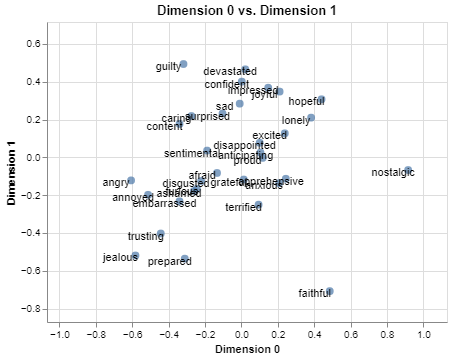

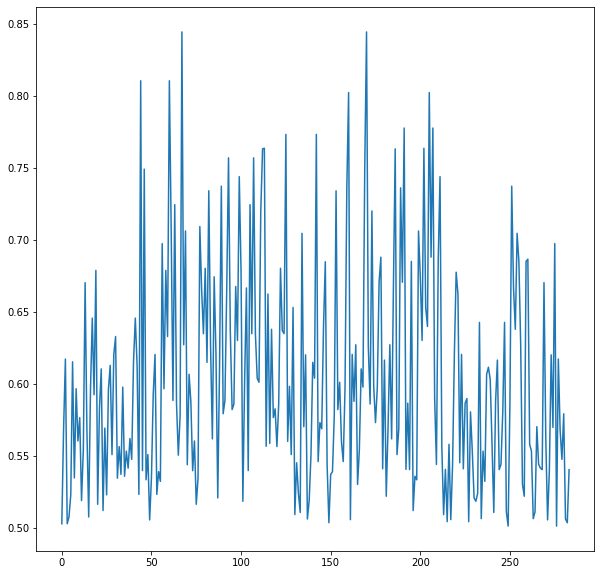

In [ ]:
# Word similarity line plot
pd.Series(similar_groups.values()).plot(figsize=(10,10))